In [1]:
import scipy.constants as consts
from lib.AtomNumbers import QD, Rb87, State, TransitionFrequency
import lib.DipoleDipoleInteractions as ddi
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sympy import *
import datetime
%matplotlib inline

No database file found at ../data/RMEdbs/Rb87.sqlite3


In [2]:
states = []
n_min = 50
n_max = 150
l_max = 1 # stop at f
sI = State(97,2,2.5,2.5)
mj_total = 2*sI.mj

for n in range(n_min,n_max):
  for l in [sI.l-1,sI.l+1]:
    for j in np.arange(abs(l-0.5),l+1): # l+0.5 doesn't regiser the second j value
      for mj in np.arange(-j,j+0.5):
        s=State(n,l,j,mj)
        states.append([s, TransitionFrequency(Rb87,sI,s)])
          
print(len(states))

2000


### calculate forster defects

In [3]:
EnergyCut = 1e9 # only consider states within 1 Ghz
molecular_states = []

for s1 in states:
  for s2 in states:
    # molecular dissociation energy limit relative to the initial state
    molecular_energy = s1[1][0]+s2[1][0]
    if abs(molecular_energy) <= EnergyCut:
      if s1[0].mj + s2[0].mj == mj_total:
        molecular_states.append([(s1[0],s2[0]), molecular_energy])

print(len(molecular_states))

190


### Build the Hamiltonian

In [4]:
dimension = len(molecular_states)+1 # add on the initial state
Hcoupling = np.zeros((dimension,dimension))
energies = np.zeros(dimension)
for i in xrange(dimension-1):
  ms = molecular_states[i]
  temp = Rb87.c3(sI,sI,ms[0][0],ms[0][1])[0]
  Hcoupling[i][-1] = temp
  Hcoupling[-1][i] = temp
  energies[i] = ms[1]*1e-9 # in GHz

#### verify at large R (100 um)

In [5]:
ddi.getRelevantCouplings(Hcoupling, energies, 100, 0.001)

[[100,
  array(-3.8002538873498926e-08),
  0.99999982334140536,
  array([190,  96,  93,  92,  97])]]

#### Calculate blockade curves

In [6]:
data = []

In [7]:
r_start = 3
r_stop = 15
samples = 500
r_last = 0
for r in np.linspace(r_start,r_stop,samples):
    current_time = datetime.datetime.now().time()
    if int(r) > int(r_last):
      print(r)
      print(current_time.isoformat())
      r_last = r
    data = data + ddi.getRelevantCouplings(Hcoupling, energies, r, 0.01, 1.0)

3.0
21:23:53.019888
4.01002004008
21:23:56.009912
5.02004008016
21:23:58.543787
6.00601202405
21:24:01.076592
7.01603206413
21:24:03.580576
8.00200400802
21:24:06.052827
9.0120240481
21:24:08.681830
10.0220440882
21:24:11.414160
11.0080160321
21:24:14.046557
12.0180360721
21:24:16.727793
13.004008016
21:24:19.330641
14.0140280561
21:24:22.157357
15.0
21:24:24.620963


In [8]:
mark_r = [0.20202, 0.40404, 0.606061, 0.808081, 1.0101, 1.21212, 1.41414, \
1.61616, 1.81818, 2.0202, 2.22222, 2.42424, 2.62626, 2.82828, 3.0303, \
3.23232, 3.43434, 3.63636, 3.83838, 4.0404, 4.24242, 4.44444, \
4.64646, 4.84848, 5.05051, 5.25253, 5.45455, 5.65657, 5.85859, \
6.06061, 6.26263, 6.46465, 6.66667, 6.86869, 7.07071, 7.27273, \
7.47475, 7.67677, 7.87879, 8.08081, 8.28283, 8.48485, 8.68687, \
8.88889, 9.09091, 9.29293, 9.49495, 9.69697, 9.89899, 10.101, 10.303, \
10.5051, 10.7071, 10.9091, 11.1111, 11.3131, 11.5152, 11.7172, \
11.9192, 12.1212, 12.3232, 12.5253, 12.7273, 12.9293, 13.1313, \
13.3333, 13.5354, 13.7374, 13.9394, 14.1414, 14.3434, 14.5455, \
14.7475, 14.9495, 15.1515, 15.3535, 15.5556, 15.7576, 15.9596, \
16.1616, 16.3636, 16.5657, 16.7677, 16.9697, 17.1717, 17.3737, \
17.5758, 17.7778, 17.9798, 18.1818, 18.3838, 18.5859, 18.7879, \
18.9899, 19.1919, 19.3939, 19.596, 19.798, 20.]
mark_B = [-10966.3, -1370.79, -406.16, -171.349, -87.7303, -50.7695, -31.971, \
-21.4175, -15.0414, -10.9642, -8.23635, -6.34261, -4.98687, -3.99069, \
-3.24218, -2.66872, -2.22181, -1.86818, -1.58454, -1.35422, -1.16507, \
-1.00814, -0.876692, -0.76563, -0.671032, -0.589863, -0.51975, \
-0.458827, -0.405612, -0.358925, -0.317818, -0.281522, -0.24941, \
-0.220963, -0.195746, -0.17339, -0.153577, -0.136026, -0.120493, \
-0.106757, -0.0946198, -0.0839036, -0.074448, -0.0661083, -0.0587547, \
-0.0522711, -0.0465538, -0.0415106, -0.0370599, -0.0331295, \
-0.0296559, -0.0265832, -0.0238624, -0.0214505, -0.01931, -0.017408, \
-0.0157157, -0.0142081, -0.0128632, -0.0116618, -0.0105871, \
-0.00962452, -0.00876107, -0.00798552, -0.00728798, -0.00665975, \
-0.00609318, -0.00558157, -0.00511896, -0.00470014, -0.00432048, \
-0.0039759, -0.00366277, -0.00337787, -0.00311837, -0.00288173, \
-0.00266568, -0.00246822, -0.00228756, -0.00212208, -0.00197036, \
-0.0018311, -0.00170316, -0.0015855, -0.0014772, -0.00137741, \
-0.00128538, -0.00120043, -0.00112194, -0.00104937, -0.000982209, \
-0.00092, -0.000862334, -0.000808835, -0.000759164, -0.000713011, \
-0.000670096, -0.00063016, -0.000592972]

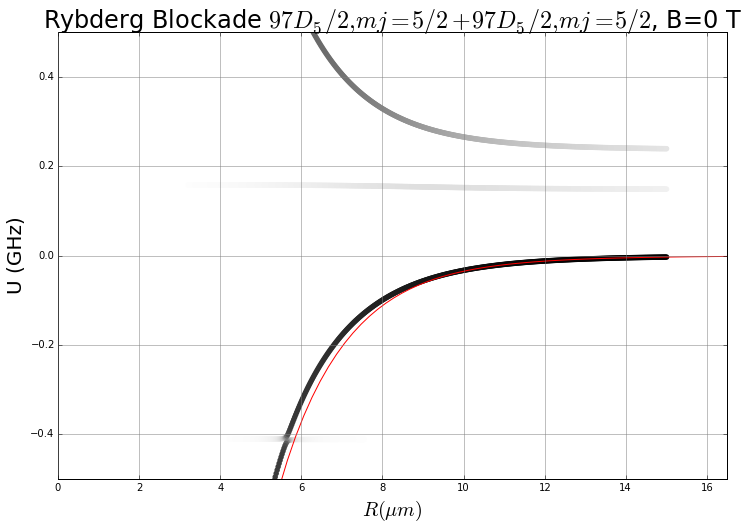

In [11]:
plt.figure(figsize=(12,8))

x =[]
x.append([ d[0] for d in data ])
x.append([ d[1] for d in data ])
x.append(np.real([ 1-sqrt(d[2]) for d in data ]))

idx = x[2].argsort()[::-1]
x[0] = [ x[0][i] for i in idx ]
x[1] = [ x[1][i] for i in idx ]
x[2] = [ x[2][i] for i in idx ]

plt.scatter(x[0], x[1], c=x[2], marker='o', s=30, vmax=1, vmin=0, linewidth=0, alpha=1)
plt.plot(mark_r,mark_B, color='r')

plt.gray()
plt.ylim(-0.5,0.5)
plt.xlim(0,1.1*r_stop)

plt.grid(b=True, which='major', color='0.5', linestyle='-')
plt.grid(b=True, which='minor', color='0.75', linestyle='--')

plt.title('Rybderg Blockade ${}+{}$, B=0 T'.format(sI,sI), fontsize=24)
plt.xlabel('$R (\mu m)$', fontsize=20)
plt.ylabel('U (GHz)', fontsize=20)

#plt.savefig('MolecularResonances_B=370uT_97D52m52_97D52m52.pdf')
plt.show()